# Стандартные библиотеки Python
*Материал является переводом официальной документации: https://docs.python.org/3/tutorial/. Автор перевода Меликов П.И. (https://pmelikov.ru/). Лицензия MIT (любое использование, в т.ч. коммерческое, но с указанием авторства.*

## 1. Интерфейс операционной системы
Модуль os предоставляет большое колличество функций для взаимодействия с операционной системой:

In [1]:
import os

print (os.getcwd())      # Вернуть (получить) текущий рабочий каталог
os.system('mkdir today')  # Запускаем команду mkdir в системной оболочке
os.chdir('./today')   # Изменить текущий рабочий каталог (перейти в созданную папку)\
print (os.getcwd())

os.chdir('../')
os.rmdir('today') #удалить созданную папку
print (os.getcwd())

/home/pmelikov/Python для анализа данных. Семинар 3.
/home/pmelikov/Python для анализа данных. Семинар 3./today
/home/pmelikov/Python для анализа данных. Семинар 3.


Обязательно используйте `import os` вместо `from os import *`. Это не позволит функции `os.open ()` заменить встроенную функцию open (), которая работает по-другому.

Вы можете воспользоватся функциями `dir ()` и `help ()`, передав `os` в качестве параметра, чтобы получить список доступных методов этой библиотеки и справку по ним. Например:
```Python
import os

dir(os)
help(os)
```
Для повседневных задач управления файлами и каталогами модуль `shutil` предоставляет более простой в использовании интерфейс более высокого уровня:
```Python
import shutil

#копирование файла
shutil.copyfile('Python для анализа данных. Семинар 1..ipynb', 'copy_of_lesson.ipynb')
#перемещение файла
shutil.move('/build/executables', 'installdir')
```

## 2. Поиск файлов на основе подстановочных данных (Wildcards)
Модуль `glob` находит все пути, совпадающие с заданным шаблоном в соответствии с правилами, используемыми системной оболочкой операционной системы.

Обрабатываются символы:
* "*" (произвольное количество символов),
* "?" (один символ), и диапазоны символов с помощью [].

Для использования тильды "~" и переменных окружения необходимо использовать `os.path.expanduser()` и `os.path.expandvars()`.

Для поиска спецсимволов, заключайте их в квадратные скобки. Например, [?] соответствует символу "?".

* glob.glob(pathname) возвращение список (возможно, пустой) путей, соответствующих шаблону pathname. Путь может быть как абсолютным (например, /usr/src/Python-1.5/Makefile) или относительный (как ../../Tools/*/*.gif).
* glob.escape(pathname) - экранирует все специальные символы для glob ("?", "*" и "["). Специальные символы в имени диска не экранируются (так как они там не учитываются), то есть в Windows escape("//?/c:/Quo vadis?.txt") возвращает "//?/c:/Quo vadis[?].txt".

Указанный ниже код выведет имена всех файлов в текущей папке, содержащие `*.ipynb`. Звездочка означает подстановку любого колличества любых знаков.

In [2]:
import glob

glob.glob('*.ipynb')
#или так, если нам нужно именно занятие от 0 до 9.
# ? - соответствует одному любому символу, в данном случае - первой точке
glob.glob('*[0-9]?.ipynb')

['Python для анализа данных. Семинар 3..ipynb']

## 3. Аргументы командной строки
Когда вы делаете какие-либо сценарии, когда при запуске кода вам нужно передать ему какие то параметры, то возникает необходимость  в обработке аргументов командной строки. Эти аргументы хранятся в атрибуте `argv` модуля `sys` в виде списка.

Рассмотрим пример. Здесь код запущен через вызов системной команды вызова интерпретатора, о чем говорит восклицательный знак. Т.е. здесь не Jupyter выполняет python код, а системный интерпретатор. При этом код передаем просто как агрумент.

Если бы наш код хранился в каком то файле, то мы бы написали `python demo.py one two three`, например.

Вы могли, например использовать один и тот же скрипт, но в разных целях. Например, если передан параметр `one` - делать одно, а если другой -то другое действие, или все сразу. Или просто передавать какое-либо значение, например путь к датасету.

In [3]:
!python3 -c 'import sys; print(sys.argv)' one two three

['-c', 'one', 'two', 'three']


Модуль `argparse` предоставляет более сложный механизм для обработки аргументов командной строки. Следующий код извлекает одно или несколько имен файлов и необязательное количество отображаемых строк:

In [4]:
command= """import argparse 
parser = argparse.ArgumentParser(prog = "top_lines", description = "Показать верхние строки из каждого файла") #указание имени программы и ее описания
parser.add_argument("filenames", nargs="+") #добавление аргументов к программе, чтобы она их обрабатывала, когда вызывается вся программа интерпретатором
parser.add_argument("-l", "--lines", type=int, default=10) #добавление аргумента "lines"
args = parser.parse_args() #запись прочитанных аргументов в массив
print(args) """

!python3 -c '{command}' "Python для анализа данных. Семинар 1..ipynb" #запуск программы через системный интерпретатор, а не блокнотовский
!echo "----"
!python3 -c '{command}' -h

Namespace(filenames=['Python для анализа данных. Семинар 1..ipynb'], lines=10)
----
usage: top_lines [-h] [-l LINES] filenames [filenames ...]

Показать верхние строки из каждого файла

positional arguments:
  filenames

optional arguments:
  -h, --help            show this help message and exit
  -l LINES, --lines LINES


Ниже представлены три основных аргумента для `argparse.ArgumentParser`
* `prog` - Название программы (по умолчанию: `sys.argv [0]`)
* `description` - Текст, отображаемый перед справкой по аргументу (по умолчанию: `None`)
* `add_help` - Добавить `-h/--help` параметр парсера (по умолчанию: `True`)

Если бы вы создали данный код отдельным python файлом, то из системной оболочки (командной строки или терминала вашей ОС), например командой `python3 top.py --lines = 5 alpha.txt beta.txt` сценарий устанавливает `args.lines` равным `5`, а `args.filenames - ['alpha.txt', 'beta.txt']`.

## 4. Соответствие строковому шаблону (регулярные выражения)
Модуль `re` предоставляет инструменты регулярных выражений для расширенной обработки строк. Для сложных сопоставлений и манипуляций регулярные выражения предлагают краткие, оптимизированные решения:

In [5]:
import re
print (re.findall(r'\bf[a-z]*', 'which foot or hand fell fastest')) #найдет любые слова, начинающиеся на f[любая буква]любой символ

['foot', 'fell', 'fastest']


Когда вам нужно найти символ в строке, в большей части случаев вы можете просто использовать этот символ или строку. Так что, когда нам нужно проверить наличие слова «dog», то мы будем использовать буквы в dog. Конечно, существуют определенные символы, которые заняты регулярными выражениями. Они так же известны как метасимволы. Внизу изложен полный список метасимволов, которые поддерживают регулярные выражения Python:

`. ˆ $ * + ? { } [ ] | ( )`

Давайте взглянем как они работают. Основная связка метасимволов, с которой вы будете сталкиваться, это квадратные скобки: `[` и `]`. Они используются для создания «класса символов», который является набором символов, которые вы можете сопоставить. Вы можете отсортировать символы индивидуально, например, так: [xyz]. Это сопоставит любой внесенный в скобки символ. Вы также можете использовать тире для выражения ряда символов, соответственно: `[a-g]`. В этом примере мы сопоставим одну из букв в ряде между a и g. Фактически для выполнения поиска нам нужно добавить начальный искомый символ и конечный. Чтобы упростить это, мы можем использовать звездочку. Вместо сопоставления `*`, данный символ указывает регулярному выражению, что предыдущий символ может быть сопоставлен 0 или более раз. Давайте посмотрим на пример, чтобы лучше понять о чем речь:

`a[b-f]*f`

Этот шаблон регулярного выражения показывает, что мы ищем букву а, ноль или несколько букв из нашего класса, [b-f] и поиск должен закончиться на f. Давайте используем это выражение в Python:

In [6]:
import re
text = 'abcdfghijk'
 
parser = re.search('a[b-f]*f', text)
print(parser.group()) # 'abcdf'

abcdf


Это выражение просмотрит всю переданную ей строку, в данном случае это `abcdfghijk`.
Выражение найдет нашу букву `а` в начале поиска. Затем, в связи с тем, что она имеет класс символа со звездочкой в конце, выражение прочитает остальную часть строки, что бы посмотреть, сопоставима ли она. Если нет, то выражение будет пропускать по одному символу, пытаясь найти совпадения. Вся магия начинается, когда мы вызываем поисковую функцию модуля `re`. Если мы не найдем совпадение, тогда мы получим `None`. В противном случае, мы получим объект `Match`. Чтобы увидеть, как выглядит совпадение, вам нужно вызывать метод `group()`.

| Метод / Атрибут | Цель |
| ------------------ | ------------------------------ -------------------------------------- |
| group() | Вернуть строку, совпадающую с RE |
| start () | Вернуть начальную позицию матча |
| end () | Вернуть конечную позицию матча |
| span () | Вернуть кортеж, содержащий (начало, конец) позиции матча (span - промежуток с англ.)|
| match() | Определите, совпадает ли RE в начале строки. |
| search () | Просматривайте строку в поисках любого место, где соответствует этот RE. |
| findall () | Найдите все подстроки, которым соответствует RE, и возвращает их в виде списка. |
| finditer () | Найдите все подстроки, которым соответствует RE, и возвращает их как итератор. |

Существует еще один повторяемый метасимвол, аналогичный `*`. Этот символ `+`, который будет сопоставлять один или более раз. Разница с `*`, который сопоставляет от нуля до более раз незначительна, на первый взгляд.

Символу `+` необходимо как минимум одно вхождение искомого символа. Последние два повторяемых метасимвола работают несколько иначе. Рассмотрим знак вопроса `?`, применение которого выгладит так: `co-?op`. Он будет сопоставлять и `coop` и `co-op`. Последний повторяемый метасимвол это `{a,b}`, где `а` и `b` являются десятичными целыми числами. Это значит, что должно быть не менее `а` повторений, но и не более `b`. Ниже представлен пример:

In [7]:
import re
text = 'xbbbbz  xz xz xbbz'
 
parser = re.findall('xb{1,4}z', text)
print(parser) # 'abcdf'

['xbbbbz', 'xbbz']


Это очень примитивный пример, но в нем говорится, что мы сопоставим следующие комбинации: xz, xbbz, xbbbz и xbbbbz, но не xz, так как он не содержит «b».

Следующий метасимвол это `^`. Этот символ позволяет нам сопоставить символы которые не находятся в списке нашего класса. Другими словами, он будет дополнять наш класс. Это сработает только в том случае, если мы разместим `^` внутри нашего класса. Если этот символ находится вне класса, тогда мы попытаемся найти совпадения с данным символом. Наглядным примером будет следующий: `[ˆa]`.Это выражение будет искать совпадения с любой буквой, кроме «а». Символ ^ также используется как якорь, который обычно используется для совпадений в начале строки.

Подробнее про регулярные выражения и их другие метасимволы можно почитать тут: https://python-scripts.com/import-re-regular-expression

In [8]:
import re
text = 'anton oleg aanton'
 
parser = re.findall('[^a]* ', text)
print(parser) # 'abcdf'

['nton oleg ']


Когда вам необходимы только простые операции, предпочтительны строковые методы, потому что их легче читать и отлаживать. Например замена слов при помощи строкового метода `.replace()`:

In [9]:
'tea for too'.replace('too', 'two')

'tea for two'

## 5. Математика, случайные числа и статистика
Математический модуль предоставляет доступ к базовым функциям библиотеки C для математики с плавающей запятой, реализованным в откомпилированном при помощи языка С модуле Python. (Откомпилированные модули Python  обладают наибольшей доступной производительноситью. Лучше только асемблерный код или машинный.)

| Функция | Описание |
| ---------------- | -------------------------------- -------------------------------------------------- ----------- |
| ceil (x) | Возвращает наименьшее целое число, большее или равное x. |
| copysign (x, y) | Возвращает x со знаком y |
| fabs (х) | Возвращает абсолютное значение x |
| factorial (x) | Возвращает факториал x |
| floor (x) | Возвращает наибольшее целое число, меньшее или равное x |
| fmod (x, y) | Возвращает остаток от деления x на y |
| frexp (x) | Возвращает мантиссу и показатель степени x как пару (m, e) |
| fsum (итерация) | Возвращает точную сумму значений с плавающей запятой в итерируемом |
| isfinite (x) | Возвращает True, если x не является ни бесконечностью, ни NaN (не числом) |
| isinf (x) | Возвращает True, если x - положительная или отрицательная бесконечность |
| isnan (x) | Возвращает True, если x - NaN |
| ldexp (x, i) | Возвращает x * (2 ** i) |
| modf (x) | Возвращает дробную и целую части x |
| trunc (x) | Возвращает усеченное целочисленное значение x |
| ехр (х) | Возврат e ** x |
| expm1 (x) | Возвращает e ** x - 1 |
| log (x [, b]) | Возвращает логарифм x по основанию b (по умолчанию e) |
| log1p (x) | Возвращает натуральный логарифм 1 + x |
| log2 (x) | Возвращает логарифм x по основанию 2 |
| log10 (x) | Возвращает десятичный логарифм числа x |
| pow (x, y) | Возвращает x в степени y |
| sqrt (x) | Возвращает квадратный корень из x |
| acos (x) | Возвращает арккосинус x |
| asin (x) | Возвращает арксинус x |
| атан (х) | Возвращает арктангенс x |
| atan2 (y, x) | Возвращает атан (г / х) |
| cos (x) | Возвращает косинус x |
| hypot (x, y) | Возвращает евклидову норму sqrt (x * x + y * y) |
| sin (х) | Возвращает синус x |
| tan (х) | Возвращает тангенс x |
| degrees (x) | Преобразует угол x из радианов в градусы |
| radians (x) | Преобразует угол x из градусов в радианы |
| acosh (x) | Возвращает обратный гиперболический косинус x |
| asinh (x) | Возвращает гиперболический синус, обратный x |
| atanh (х) | Возвращает обратный гиперболический тангенс x |
| cosh (x) | Возвращает гиперболический косинус x |
| sinh (x) | Возвращает гиперболический косинус x |
| tanh (x) | Возвращает гиперболический тангенс x |
| erf (x) | Возвращает функцию ошибок в x |
| erfc (x) | Возвращает дополнительную функцию ошибок в x |
| gamma (х) | Возвращает гамма-функцию в точке x |
| lgamma (x) | Возвращает натуральный логарифм абсолютного значения гамма-функции в точке x |
| pi  Математическая константа, отношение длины окружности к ее диаметру (3,14159 ...) |
| e | математическая константа e (2,71828 ...) |

In [10]:
import math
print (math.cos(math.pi / 4))
print(math.log(1024, 2))

0.7071067811865476
10.0


Модуль random предоставляет инструменты для случайного выбора и генерации случайных чисел:

In [11]:
import random

print(random.choice(['apple', 'pear', 'banana'])) #случайный выбор из списка
print (random.sample(range(100), 10)) # генерация случайного набора значений
print (random.random())    # случайное с плавающей точкой float
print (random.randrange(6))    # случайное значение integer выбранное из диапазона (6), т.е. от [0 до 6)


apple
[65, 79, 15, 97, 3, 5, 49, 98, 46, 25]
0.46503625848606844
0


Модуль статистики вычисляет основные статистические свойства (среднее значение, медиана, дисперсия и т. д.) числовых данных.
В проекте SciPy <https://scipy.org> есть много других модулей для численных вычислений.


In [12]:
import statistics

data = [2.75, 1.75, 1.25, 0.25, 0.5, 1.25, 3.5]
print (statistics.mean(data)) #среднее
print (statistics.median(data)) # медиана
print (statistics.variance(data)) #дисперсия

1.6071428571428572
1.25
1.3720238095238095


## 6. Доступ в Интернет
Существует ряд модулей для доступа в Интернет и обработки интернет-протоколов. Два из самых простых - urllib.request для получения данных из URL-адресов и smtplib для отправки почты.

Например, в коде ниже скачивается код страницы 'https://stankin.ru/sys/img/logo_ru.svg'и отображается в блокноте.

In [13]:
from urllib.request import urlopen
with urlopen('https://stankin.ru/sys/img/logo_ru.svg') as response:
    html = response.read()
    #for line in response:
    #    print(line)

        
from IPython.display import HTML, display
#отрисовка html кода
display (HTML(html.decode("utf-8")))
#показать кусочек скачанного html кода
display (html[:60])


b'<svg width="567" height="318" viewBox="0 0 567 318" fill="no'

## 7. Даты и время
Модуль `datetime` предоставляет классы для управления датами и временем как простыми, так и сложными способами. Хотя арифметика даты и времени поддерживается, основное внимание в реализации уделяется эффективному извлечению элементов для форматирования и обработки вывода. Модуль также поддерживает объекты с учетом часового пояса.

In [14]:
# даты легко конструируются и форматируются
from datetime import date

now = date.today()
print (now)
print (date(2003, 12, 2))

print (now.strftime("%m-%d-%y. %d %b %Y это %A %d день %B."
'12-02-03. 02 Dec 2003 это Вторник или 02 день декабря.'))

# даты поддерживают календарную арифметику
birthday = date(1964, 7, 31)
age = now - birthday
print ("Вам ", age.days," дней или", int(age.days / 365.25), " лет")


2021-07-28
2003-12-02
07-28-21. 28 Jul 2021 это Wednesday 28 день July.12-02-03. 02 Dec 2003 это Вторник или 02 день декабря.
Вам  20816  дней или 56  лет


## 8. Сжатие данных
Стандартные форматы архивирования и сжатия данных напрямую поддерживаются модулями, включая: zlib, gzip, bz2, lzma, zipfile и tarfile.

In [15]:
import zlib

s = bytes("Пой же пой на проклятой гитаре", 'utf-8')
print("Размер до сжатия: ",len(s))
crc1= zlib.crc32(s)
print ("Контрольная сумма до сжатия: ", crc1)

t = zlib.compress(s)
print ("Размер после сжатия: ",len(t))

t=zlib.decompress(t)
crc2= zlib.crc32(t)
print ("Контрольная сумма после распаковки: ", crc2)
if crc1==crc2:
    print ('\033[92m'+"Контрольная суммы равны!"+'\033[0m')

Размер до сжатия:  55
Контрольная сумма до сжатия:  1530206883
Размер после сжатия:  53
Контрольная сумма после распаковки:  1530206883
Контрольная суммы равны!


## 9. Измерение производительности
Некоторые пользователи Python проявляют глубокий интерес к знанию относительной производительности различных подходов к одной и той же проблеме. Python предоставляет инструмент измерения, который сразу же отвечает на эти вопросы.

Например, может возникнуть соблазн использовать функцию упаковки и распаковки кортежей вместо традиционного подхода к обмену аргументами. Модуль timeit быстро демонстрирует скромное преимущество в производительности:

* первый параметр - функция, которую вы хотите протестировать
* второй параметр - начальная инициализация значений для теста функции
* сколько раз тестировать

In [16]:
#1 вариант измерения производительности 
import timeit
iterations=5 # склько раз тестировать быстродействие
usec=timeit.timeit('a=a**b; print ("Я посчитал:",a)', setup='a=5; b=2', number= iterations)
print("суммарно за", usec, "наносекунд")

Я посчитал: 25
Я посчитал: 625
Я посчитал: 390625
Я посчитал: 152587890625
Я посчитал: 23283064365386962890625
суммарно за 0.00030600797617807984 наносекунд


Второй подход - измерение времени через таймер:

In [17]:
#2 вариант измерения производительности
import time

start_time = time.time()

for i in range(5):
    a=5; b=2
    a=a**b; print ("Я посчитал:",a)
        
print("суммарно за %s наносекунд ---" % (time.time() - start_time))

Я посчитал: 25
Я посчитал: 25
Я посчитал: 25
Я посчитал: 25
Я посчитал: 25
суммарно за 0.0016069412231445312 наносекунд ---


## 10. Контроль качества
Один из подходов к разработке высококачественного программного обеспечения - это писать тесты для каждой функции по мере ее разработки и часто запускать эти тесты в процессе разработки.

Модуль doctest предоставляет инструмент для сканирования модуля и проверки тестов, встроенных в строки документации программы. Создание теста так же просто, как вырезание и вставка типичного вызова вместе с его результатами в строку документации. Это улучшает документацию, предоставляя пользователю пример и позволяет модулю doctest убедиться, что код соответствует документации:

In [18]:
def average(values):
    """Вычисляет среднее арифметическое списка чисел.

    >>> print(average([20, 30, 70]))
    40.0
    """
    return sum(values) / len(values)

import doctest
doctest.testmod()   # автоматически проверять встроенные тесты

TestResults(failed=0, attempted=1)

Первая строчка в """ - это комментарий, который будет отображатся, когда вы наводите мышкой на функцию average() в среде разработки, например PyCharm.

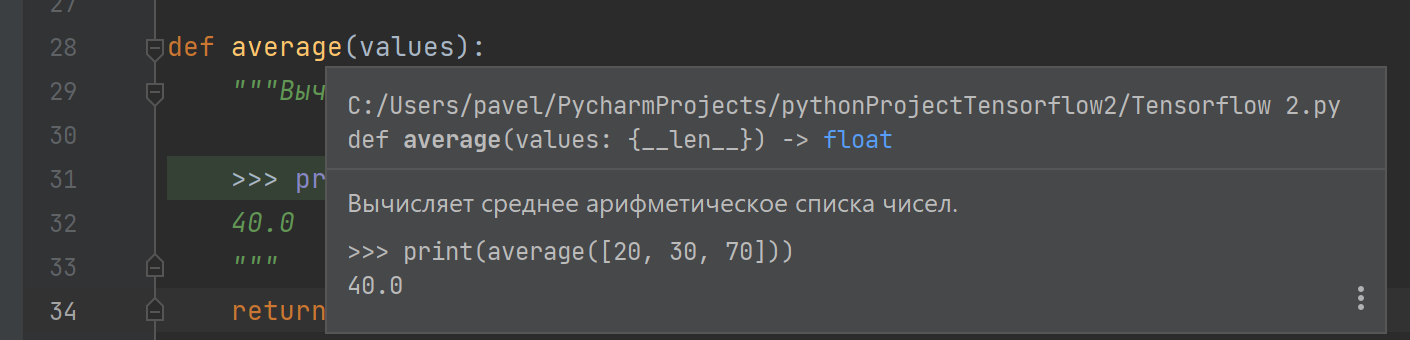

Модуль unittest не так прост, как модуль doctest, но он позволяет хранить более полный набор тестов в отдельном файле:

In [19]:
import unittest

class TestStringMethods(unittest.TestCase):

    def test_upper(self): #тест функции upper() (преобразует регистр в верхний)
        self.assertEqual('foo'.upper(), 'FOO')

    def test_isupper(self):
        self.assertTrue('FOO'.isupper()) #проверка что все в верхнем регистре
        self.assertFalse('Foo'.isupper())

    def test_split(self):
        s = 'hello world'
        self.assertEqual(s.split(), ['hello', 'world'])
        # проверяем, что s.split не работает, если разделитель не является строкой
        with self.assertRaises(TypeError):
            s.split(2)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


## 11. Многопоточность
Многопоточность - это метод разделения задач, которые не зависят друг от друга. Потоки можно использовать для улучшения реакции приложений, которые принимают ввод пользователя, в то время как другие задачи выполняются в фоновом режиме. Связанный вариант использования - запуск ввода-вывода параллельно с вычислениями в другом потоке.

В следующем коде показано, как модуль потоковой передачи более высокого уровня может выполнять задачи в фоновом режиме, пока основная программа продолжает выполняться:

In [20]:
import threading, zipfile

class AsyncZip(threading.Thread):
    def __init__(self, infile, outfile):
        threading.Thread.__init__(self)
        self.infile = infile
        self.outfile = outfile

    def run(self):
        f = zipfile.ZipFile(self.outfile, 'w', zipfile.ZIP_DEFLATED)
        f.write(self.infile)
        f.close()
        print('Готова фоновая zip запаковка файла:', self.infile)

f = open("mydata.txt", "a")
f.write("Теперь в файле больше содержимого!")
f.close()

background = AsyncZip('mydata.txt', 'myarchive.zip')
background.start()
print('Основная программа продолжает работать на переднем плане.')

background.join()    # Дождитесь завершения фоновой задачи
print('Основная программа дождалась завершения фоновой обработки.')

Основная программа продолжает работать на переднем плане.Готова фоновая zip запаковка файла: mydata.txt

Основная программа дождалась завершения фоновой обработки.


Основная проблема многопоточных приложений - это координация потоков, которые совместно используют данные или другие ресурсы. С этой целью модуль потоковой передачи предоставляет ряд примитивов синхронизации, включая блокировки, события, переменные состояния и семафоры.

Несмотря на то, что эти инструменты являются мощными, незначительные ошибки проектирования могут привести к проблемам, которые трудно воспроизвести. Таким образом, предпочтительный подход к координации задач состоит в том, чтобы сконцентрировать весь доступ к ресурсу в одном потоке, а затем использовать модуль очереди для подачи в этот поток запросов из других потоков. Приложения, использующие объекты Queue для межпоточного взаимодействия и координации, проще разрабатывать, они более читабельны и надежны. 

Использование библиотеки multiprocessing более предпочтительно, т.к. с ней интерпретатор и программа смогут занимать больше чем 1 логическое ядро процессора. Да, threading тоже дает многопоточность, но в том и заключается отличие, что мы не можем загружать больше одного логического ядра процессора.
Пример: умножение чисел в массиве на 2. Каждый экземпляр функции выполняется отдельным процессом с уникальным ID. Т.е. за счет многопоточности мы в итоге могли выполнить данную программу ровно в 5 раз быстрее, потому что элементов в массиве 5 и было бы выполнено 5 параллельных умножений, если на компьютере доступно 5 ядер процессора (игнорируя тот факт, что современные процессоры имеют умный кеш и гипервизор задач, и на самом деле умножат все одим ядром).

In [21]:
import time
start_time = time.time()

import os
from multiprocessing import Process
 
def doubler(number):
    """
    Функция умножитель на два
    """
    result = number * 2
    proc = os.getpid()
    print('{0} doubled to {1} by process id: {2}\n'.format(
        number, result, proc))
 
if __name__ == '__main__':
    numbers = [5, 10, 15, 20, 25]
    procs = []
    
    for index, number in enumerate(numbers):
        proc = Process(target=doubler, args=(number,))
        procs.append(proc)
        proc.start()
    
    for proc in procs:
        proc.join()
        
print("--- %s наносекунд заняло наше умножение.---" % (time.time() - start_time))
print ("Так долго - потому что накладные расходы большие. Умножение работает быстро, а вот создание потоков и процессов-нет... ")

5 doubled to 10 by process id: 71169
10 doubled to 20 by process id: 71170


20 doubled to 40 by process id: 71176
15 doubled to 30 by process id: 71175
25 doubled to 50 by process id: 71181



--- 0.09059286117553711 наносекунд заняло наше умножение.---
Так долго - потому что накладные расходы большие. Умножение работает быстро, а вот создание потоков и процессов-нет... 
